
https://medium.com/@azimkhan8018/a-beginners-guide-to-deep-learning-with-mnist-dataset-0894f7183344



In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 139s 12us/step


In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

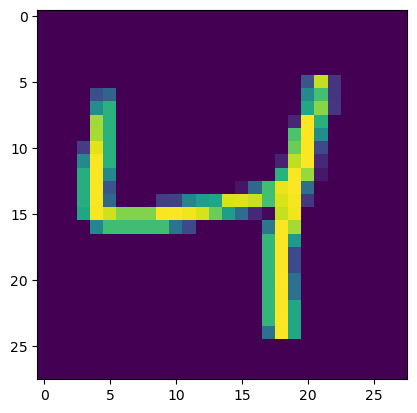

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [5]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [6]:
model= Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(11,activation='softmax'))
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │           363 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,971 (410.04 KB)

 Trainable params: 104,971 (410.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [8]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8559 - loss: 0.5041 - val_accuracy: 0.9577 - val_loss: 0.1478
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9603 - loss: 0.1318 - val_accuracy: 0.9642 - val_loss: 0.1207
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9744 - loss: 0.0844 - val_accuracy: 0.9697 - val_loss: 0.1023
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9810 - loss: 0.0617 - val_accuracy: 0.9688 - val_loss: 0.1032
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9848 - loss: 0.0479 - val_accuracy: 0.9710 - val_loss: 0.1020
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9885 - loss: 0.0368 - val_accuracy: 0.9718 - val_loss: 0.1014
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9907 - loss: 0.0296 - val_accuracy: 0.9723 - val_loss: 0.1081
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9930 - loss: 0.0239 - 

In [9]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step


0.9794

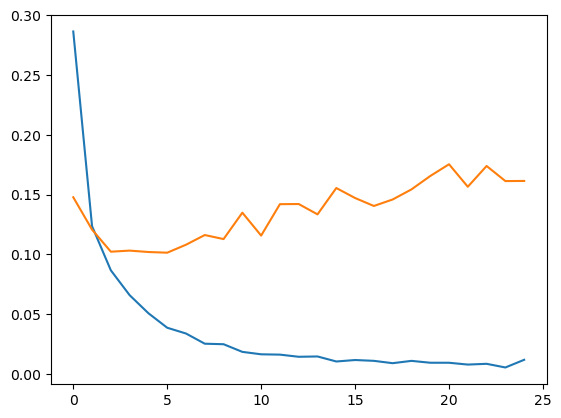

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

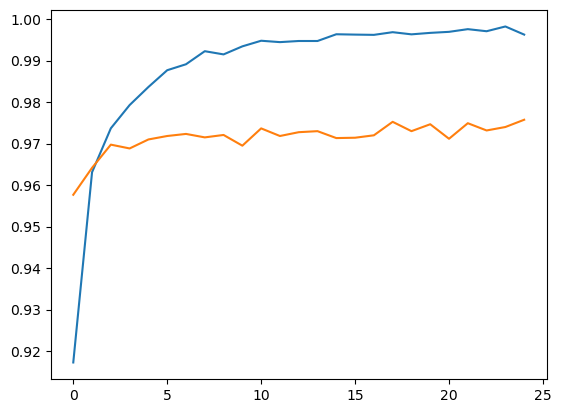

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([1])

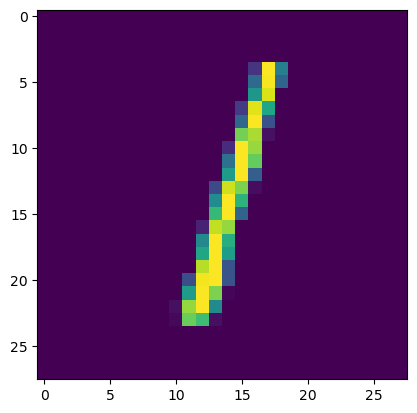

In [12]:
plt.imshow(X_test[2])
model.predict(X_test[2].reshape(1,28,28)).argmax(axis=1)